In [1]:
import os
import plotly
import numpy as np 
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras import layers
from plotly.subplots import make_subplots
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import classification_report
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image

In [2]:
class_names = pd.read_csv( r'./CLASS NAMES.csv')["COMMON NAME"].tolist()

In [3]:
working_directory = r'./input/butterfly-images40-species/'
train_path = os.path.join(working_directory, 'train')
test_path = os.path.join(working_directory, 'test')
valid_path = os.path.join(working_directory, 'valid')

In [4]:
train_generator = ImageDataGenerator(rescale = 1./255.)

test_generator = ImageDataGenerator( rescale = 1./255. )

valid_generator = ImageDataGenerator( rescale = 1./255. )

In [5]:
train = train_generator.flow_from_directory(train_path, batch_size = 20, class_mode = 'categorical', classes=class_names, target_size = (224, 224))

valid = valid_generator.flow_from_directory( valid_path,  batch_size = 20, class_mode = 'categorical',classes=class_names, target_size = (224, 224))

test = test_generator.flow_from_directory(test_path, batch_size = 20, class_mode = 'categorical',classes=class_names, target_size = (224, 224))

Found 9295 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.



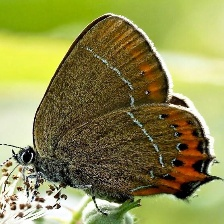
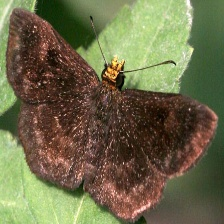
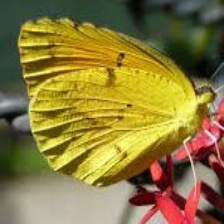
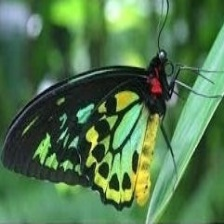
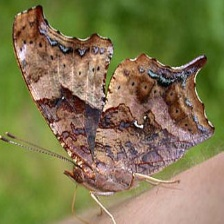
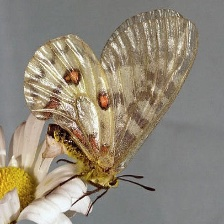
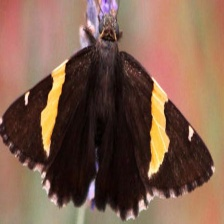
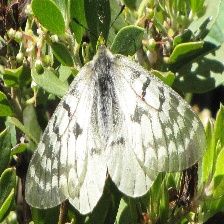
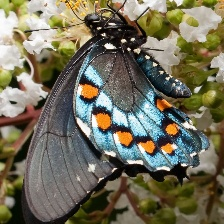
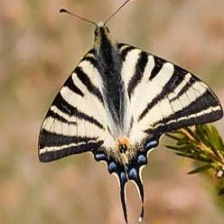
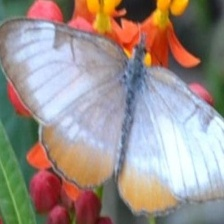
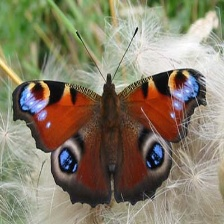
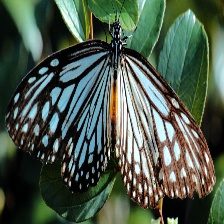
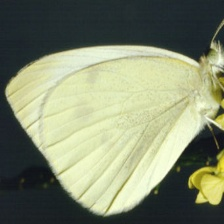
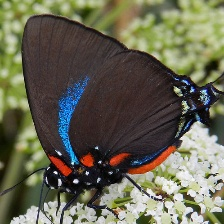
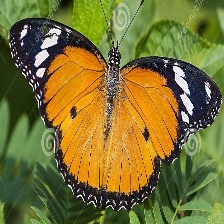

In [6]:
img, label = train.next()
rows,cols = 4,4
fig = make_subplots(rows=rows, cols=cols,horizontal_spacing=0.05,subplot_titles=[class_names[np.argmax(label[i])] for i in range(rows*cols)])
indx=0
for i in range(rows):
    for j in range(cols):
        fig.add_trace(px.imshow(img[indx]).data[0],i+1,j+1)
        indx+=1
        fig.update_layout(width=1000,height=1000)
        fig.update_xaxes(showticklabels=False)
        fig.update_yaxes(showticklabels=False)
fig.show()

In [7]:
mnv = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
#base_model = VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [8]:
for layer in mnv.layers:
    layer.trainable = False

In [9]:
x = layers.Flatten()(mnv.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(75, activation='softmax')(x)

model = tf.keras.models.Model(mnv.input, x)

model.compile(optimizer = tf.keras.optimizers.Adam(0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [10]:
mnv.summary() 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('butterfly-Image_model_weights.hdf5', monitor='val_loss', verbose=2, save_best_only=True, mode='min')
history = model.fit(train, validation_data = valid,epochs = 50, batch_size=32, callbacks=[callback, checkpoint])

Epoch 1/50
465/465 [==============================] - ETA: 0s - loss: 4.0096 - acc: 0.0949
Epoch 1: val_loss improved from inf to 2.81099, saving model to butterfly-Image_model_weights.hdf5
465/465 [==============================] - 673s 1s/step - loss: 4.0096 - acc: 0.0949 - val_loss: 2.8110 - val_acc: 0.3920
Epoch 2/50
465/465 [==============================] - ETA: 0s - loss: 3.0170 - acc: 0.2670
Epoch 2: val_loss improved from 2.81099 to 1.73739, saving model to butterfly-Image_model_weights.hdf5
465/465 [==============================] - 701s 2s/step - loss: 3.0170 - acc: 0.2670 - val_loss: 1.7374 - val_acc: 0.6480
Epoch 3/50
465/465 [==============================] - ETA: 0s - loss: 2.2802 - acc: 0.4205
Epoch 3: val_loss improved from 1.73739 to 1.23974, saving model to butterfly-Image_model_weights.hdf5
465/465 [==============================] - 658s 1s/step - loss: 2.2802 - acc: 0.4205 - val_loss: 1.2397 - val_acc: 0.7413
Epoch 4/50
465/465 [==============================] - ET